In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer()
data=pd.read_csv("C:\Python\Python385\Lib\site-packages\imdb_ds.csv")
data=data.rename(columns={'review':'text'})
data=data[:5000]
data

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
4995,An interesting slasher film with multiple susp...,negative
4996,i watched this series when it first came out i...,positive
4997,Once again Jet Li brings his charismatic prese...,positive
4998,"I rented this movie, after hearing Chris Gore ...",negative


In [24]:
import re
import string
def processor(text):
    text=text.lower()
    tokens=re.split('\W+',text)
    text=" ".join(i for i in tokens)
    return text
data['text']=data['text'].apply(processor)
data

,text,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is a...,positive
...,...,...
4995,an interesting slasher film with multiple susp...,negative
4996,i watched this series when it first came out i...,positive
4997,once again jet li brings his charismatic prese...,positive
4998,i rented this movie after hearing chris gore s...,negative


In [25]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
import string
from string import punctuation

In [27]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [28]:
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer

In [29]:
def get_pos(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('V'):
        return wn.VERB
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    else:
        return wn.NOUN

In [30]:
lemmatizer = WordNetLemmatizer()

In [31]:
from nltk import pos_tag
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [32]:
def lemmatize_words(review):
    final_review = []
    for i in review.split():
        if i.strip().lower() not in stop and i.isnumeric()==False and len(i)!=1:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_pos(pos[0][1]))
            final_review.append(word.lower())
    return " ".join(final_review)

In [33]:
data['text'] = data.text.apply(lemmatize_words)
data

,text,sentiment
0,one reviewer mention watch oz episode hooked r...,positive
1,wonderful little production br br film techniq...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stun fi...,positive
...,...,...
4995,interest slasher film multiple suspect br br i...,negative
4996,watch series first come 70 year old watch best...,positive
4997,jet li brings charismatic presence movie scree...,positive
4998,rent movie hearing chris gore say something ef...,negative


In [34]:
#by vader(valence aware dictionary for sentiment reasoning) sentiment intensity analyzer

In [35]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
def senti(dt):
    return sia.polarity_scores(dt)
data['polarity_scores']=data['text'].apply(senti)

def analy1(dic):
    if dic['compound']<0:
        return 'Negative'
    elif dic['compound']>=0:
        return 'Positive'
data['sentiment2']=data['polarity_scores'].apply(analy1)
data

,text,sentiment,polarity_scores,sentiment2
0,one reviewer mention watch oz episode hooked r...,positive,"{'neg': 0.304, 'neu': 0.583, 'pos': 0.113, 'co...",Negative
1,wonderful little production br br film techniq...,positive,"{'neg': 0.074, 'neu': 0.662, 'pos': 0.264, 'co...",Positive
2,thought wonderful way spend time hot summer we...,positive,"{'neg': 0.148, 'neu': 0.541, 'pos': 0.31, 'com...",Positive
3,basically family little boy jake think zombie ...,negative,"{'neg': 0.215, 'neu': 0.65, 'pos': 0.135, 'com...",Negative
4,petter mattei love time money visually stun fi...,positive,"{'neg': 0.029, 'neu': 0.724, 'pos': 0.247, 'co...",Positive
...,...,...,...,...
4995,interest slasher film multiple suspect br br i...,negative,"{'neg': 0.179, 'neu': 0.752, 'pos': 0.069, 'co...",Negative
4996,watch series first come 70 year old watch best...,positive,"{'neg': 0.136, 'neu': 0.672, 'pos': 0.192, 'co...",Positive
4997,jet li brings charismatic presence movie scree...,positive,"{'neg': 0.073, 'neu': 0.614, 'pos': 0.314, 'co...",Positive
4998,rent movie hearing chris gore say something ef...,negative,"{'neg': 0.184, 'neu': 0.62, 'pos': 0.196, 'com...",Positive


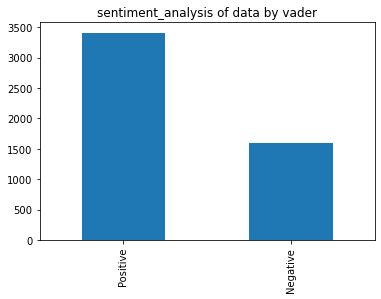

In [37]:
data.sentiment2.value_counts().plot(kind='bar',title='sentiment_analysis of data by vader')

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(data.text,data.sentiment2,test_size=0.1,random_state=0)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
cv = CountVectorizer(stop_words=stop)
x_train = cv.fit_transform(x_train)
x_test= cv.transform(x_test)

In [42]:
#LOGISTIC REGRESSION

In [43]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

e:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_pred_lr=lr.predict(x_test)
lr.score(x_train,y_train)

0.9997777777777778

In [45]:
cm=confusion_matrix(y_test,y_pred_lr)
cm

array([[127,  44],
       [ 35, 294]], dtype=int64)

In [46]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

    Negative       0.78      0.74      0.76       171
    Positive       0.87      0.89      0.88       329

    accuracy                           0.84       500
   macro avg       0.83      0.82      0.82       500
weighted avg       0.84      0.84      0.84       500



In [47]:
lr_a=accuracy_score(y_test,y_pred_lr)
print(lr_a)

0.842


In [48]:
#NAIVEBAYES MULTINOMIALNB

In [49]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred_mnb=mnb.predict(x_test)

In [50]:
mnb.score(x_train,y_train)

0.9515555555555556

In [51]:
cm=confusion_matrix(y_test,y_pred_mnb)
cm

array([[115,  56],
       [ 27, 302]], dtype=int64)

In [52]:
print(classification_report(y_test,y_pred_mnb))

              precision    recall  f1-score   support

    Negative       0.81      0.67      0.73       171
    Positive       0.84      0.92      0.88       329

    accuracy                           0.83       500
   macro avg       0.83      0.80      0.81       500
weighted avg       0.83      0.83      0.83       500



In [53]:
mnb_a=accuracy_score(y_test,y_pred_mnb)
print(mnb_a)

0.834


In [54]:
#SVM

In [55]:
ls=SVC()

In [56]:
ls.fit(x_train,y_train)
y_pred_ls=ls.predict(x_test)
ls.score(x_train,y_train)

0.9415555555555556

In [57]:
print(confusion_matrix(y_test,y_pred_ls))

[[ 82  89]
 [ 17 312]]


In [58]:
ls_a=accuracy_score(y_test,y_pred_ls)
print(ls_a)

0.788


In [59]:
print(classification_report(y_test,y_pred_ls))

              precision    recall  f1-score   support

    Negative       0.83      0.48      0.61       171
    Positive       0.78      0.95      0.85       329

    accuracy                           0.79       500
   macro avg       0.80      0.71      0.73       500
weighted avg       0.80      0.79      0.77       500



In [60]:
from sklearn.ensemble import VotingClassifier
lr1 = LogisticRegression( random_state=0)
mnb1 = MultinomialNB()
ls1 =  SVC()
model = VotingClassifier(estimators=[('lr', lr1), ('mnb', mnb1), ('ls', ls1)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

e:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.848

In [61]:
# by nlp technique

In [62]:
text="Hello! a very Good evening everyone"
p=senti(text)
print(analy1(p))

Positive


In [63]:
text1="i am not at all happy"
print(analy1(senti(text1)))

Negative


In [64]:
review="The product is brilliant. I absolutely loved it and I would recommend it to everyone"
print(analy1(senti(review)))

Positive


In [65]:
review1="It is horrible. Please don’t buy this. It is a waste of money"
print(analy1(senti(review1)))

Negative


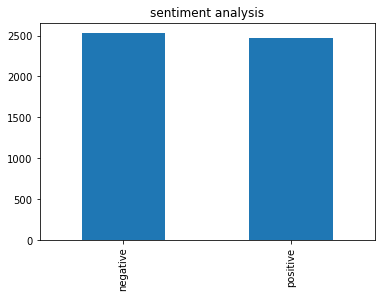

In [66]:
data.sentiment.value_counts().plot(kind='bar',title='sentiment analysis')

In [67]:
data.sentiment2.value_counts()

Positive    3410
Negative    1590
Name: sentiment2, dtype: int64

In [68]:
print(analy1(senti("the best")))

Positive


In [69]:
output = pd.DataFrame({"Model":['MultinomialNB','Logistic Regression','SVC'],
                      "Accuracy":[mnb_a,lr_a,ls_a]})
output

,Model,Accuracy
0,MultinomialNB,0.834
1,Logistic Regression,0.842
2,SVC,0.788


In [70]:
#by machine learning model

In [71]:
i=["she is a very good girl","he is very brilliant","honesty is best policy","she is  the  criminal","she is a bad girl"]

In [72]:
i=cv.transform(i)
print(lr.predict(i))

['Positive' 'Positive' 'Positive' 'Negative' 'Negative']


In [73]:
pip install SpeechRecognition

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [74]:
pip install pyttsx3

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [75]:
import speech_recognition as sr
import pyttsx3

In [76]:
rec=sr.Recognizer()

In [77]:
pip install pyaudio

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [88]:
def speakText(command):
    engine=pyttsx3.init()
    engine.say(command)
    engine.runAndWait()


In [98]:
with sr.Microphone() as source2:
    #rec.adjust_for_ambience_noise(source2,duration=0.2)
    audio2=rec.listen(source2)

    MyText=[str(rec.recognize_google(audio2))]
    #MyText=MyText.lower()
    print(MyText)
    speakText(MyText)

['hope you are doing well']


In [1]:
MyText.reshape(1,-1)
input=cv.transform(MyText)
print(lr.predict(MyText))

NameError: name 'MyText' is not defined